In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path

from mosaiks import config as c
from mosaiks.plotting import fig_2_functions as f2

save_dir = Path(c.res_dir, "figures", "Fig2")
save_dir.mkdir(exist_ok=True, parents=True)

# Get task names in the specified order

In [2]:
# get task names
c_by_app = [getattr(c, i) for i in c.app_order]
tasks = [config["application"] for config in c_by_app]
num_tasks = len(tasks)

# Grab and aggregate the data files from the primary analysis for plotting

In [3]:
agg_scale = 0.2
data_by_task = f2.aggregrate_and_bin_data(agg_scale=agg_scale)
print("dataset sizes are:")
[
    "{0}: {1}".format(tasks[t], len(data_by_task["truth_by_task"][t]))
    for t in range(num_tasks)
]

/shares/lab/Datasets/Remote_Sensing/replication/mosaiks_IB/code/mosaiks/plotting/fig_2_functions.py:350: RuntimeWarning: invalid value encountered in true_divide
  vals_grid = sums_grid / counts


dataset sizes are:


['treecover: 80000',
 'elevation: 80000',
 'population: 54375',
 'nightlights: 80000',
 'income: 73102',
 'roads: 80000',
 'housing: 64336']

# Plot  Fig 2

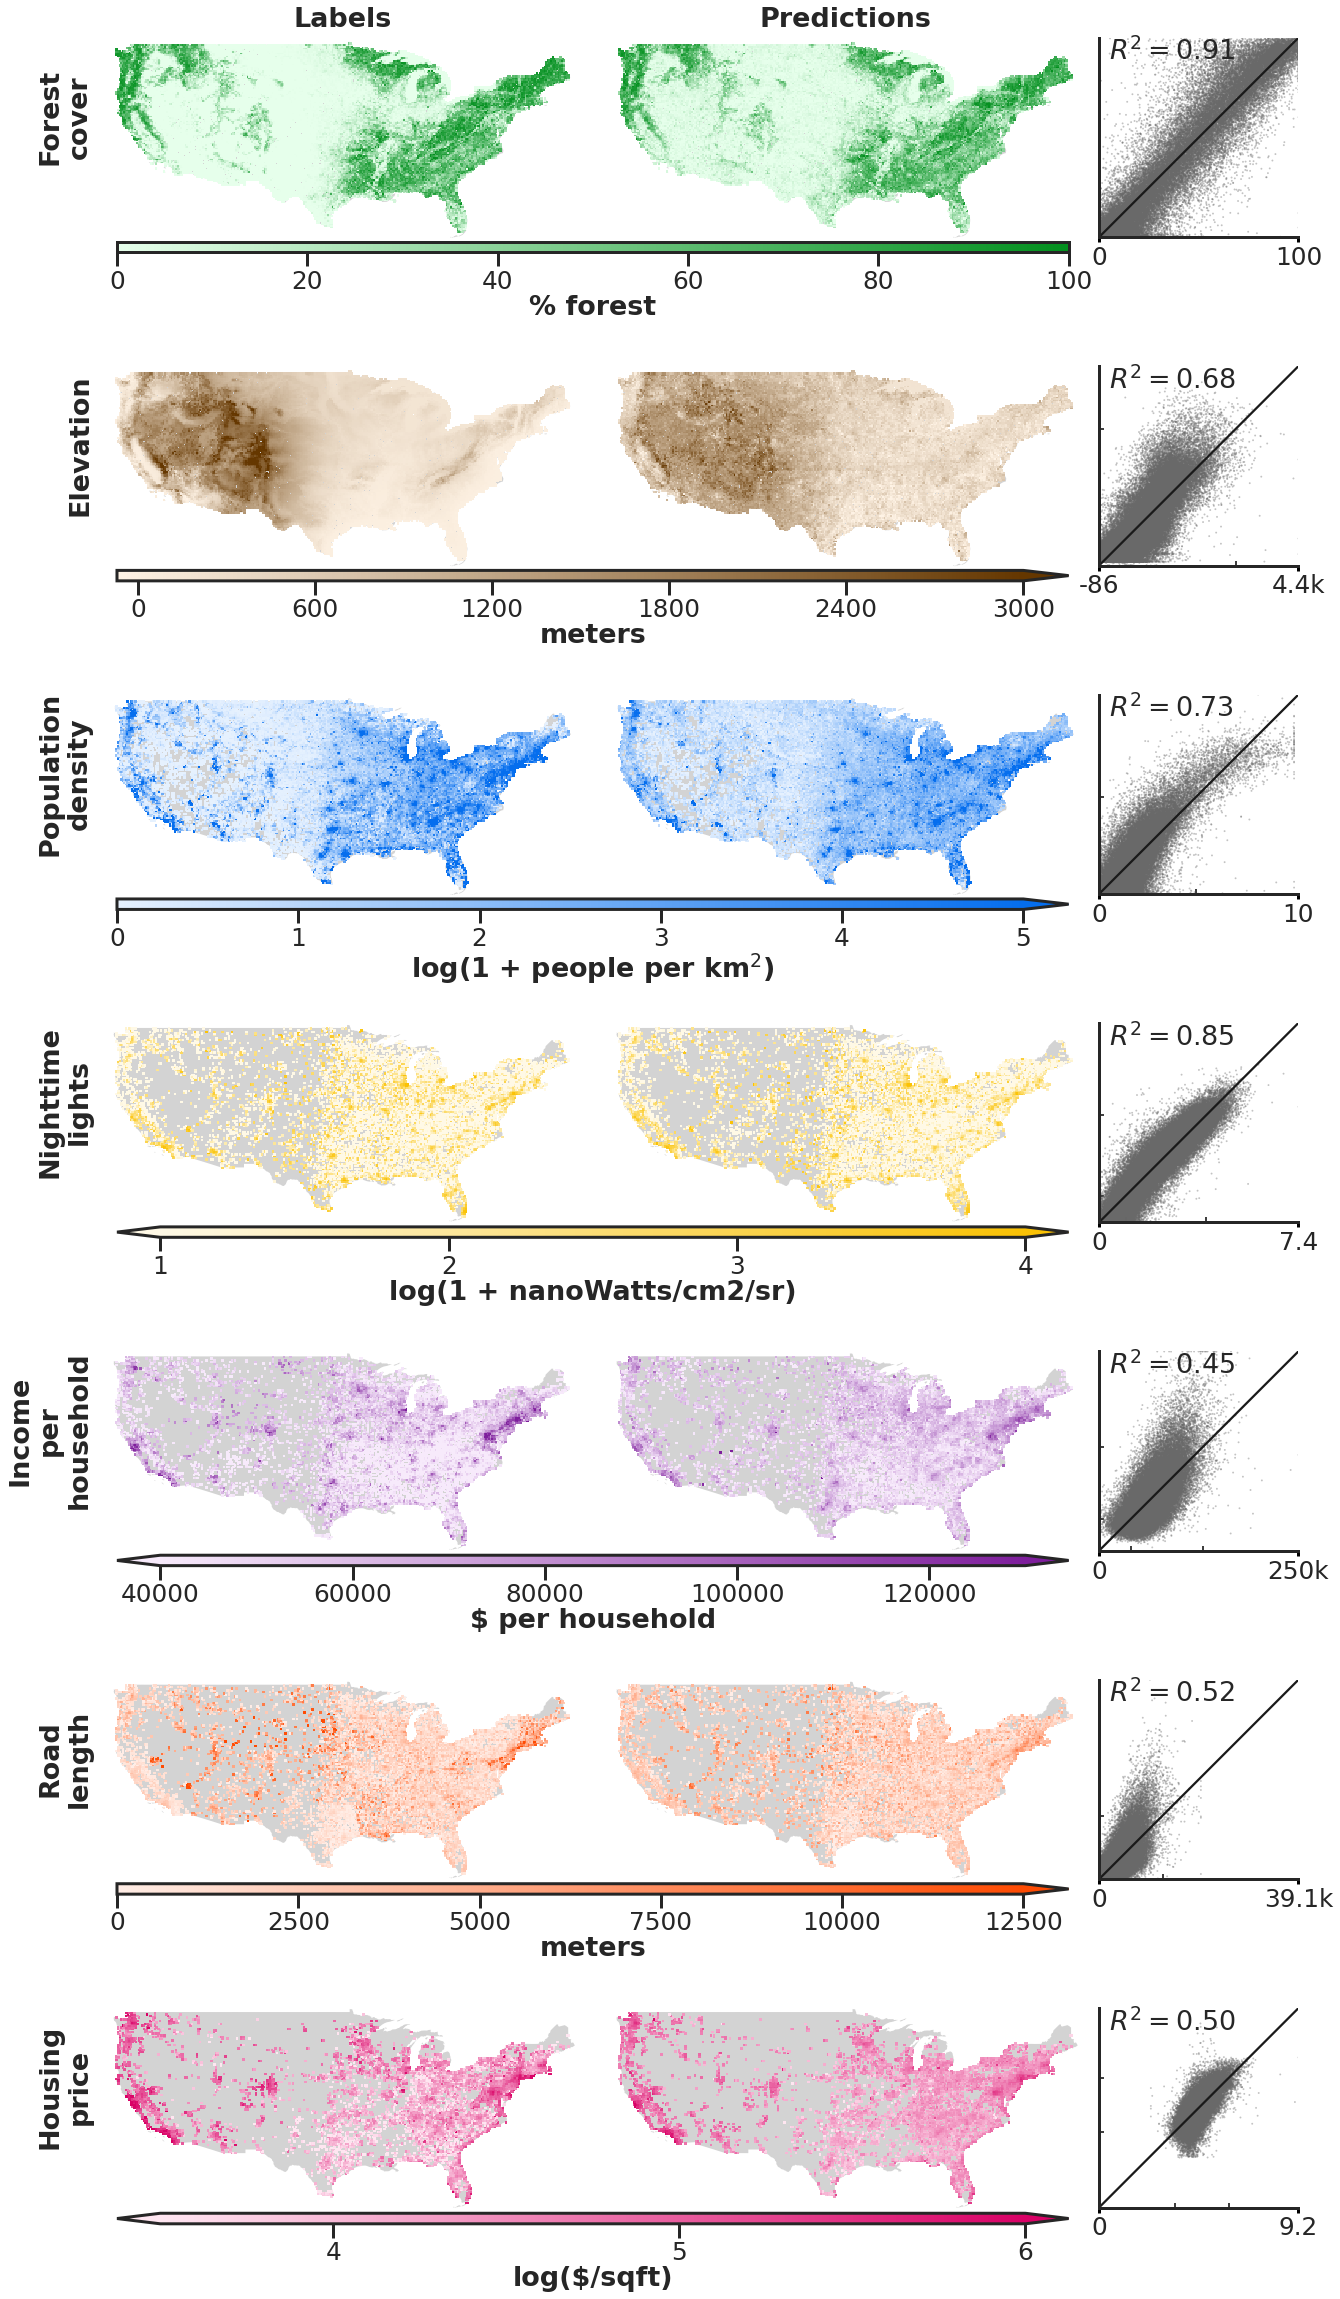

In [4]:
fig = f2.plot_figure_2(tasks, data_by_task)

In [5]:
fig.savefig(
    save_dir / "Fig2.png",
    dpi=300,
    tight_layout=True,
    bbox_inches="tight",
)